# Jupyter notebook pour l'exercice de balistique de STI2D
## Sommaire
1. affichage des trajectoires et des courbes d'après les équations de l'activité (comparaison avec les graphs produits sur tableur)
2. utilisation de méthodes numériques pour obtenir des valeurs approchées des résultats souhaités
    1. dichtonomie
    2. sécantes
3. A faire : visualisation des courbes avec frottement de l'air

## Import des modules et configurations

In [1]:
from math import pi
import numpy as np  
import matplotlib.pyplot as plt  

%matplotlib inline

## Graph de la trajectoire
Rappel de l'équation de la trajectoire :
$$z(x,\alpha) = - 1/2 . g \frac{x^2}{(V_{0}.cos(\alpha))^2} + tan(\alpha) . x + h_0$$

Constantes :
+ g = 9.81 m/s²
+ h0 = 1.70 m
+ pour le moment V0 = 72 km/h donc 20 m/s et alpha = 30 deg soit 30 * pi/180 rad

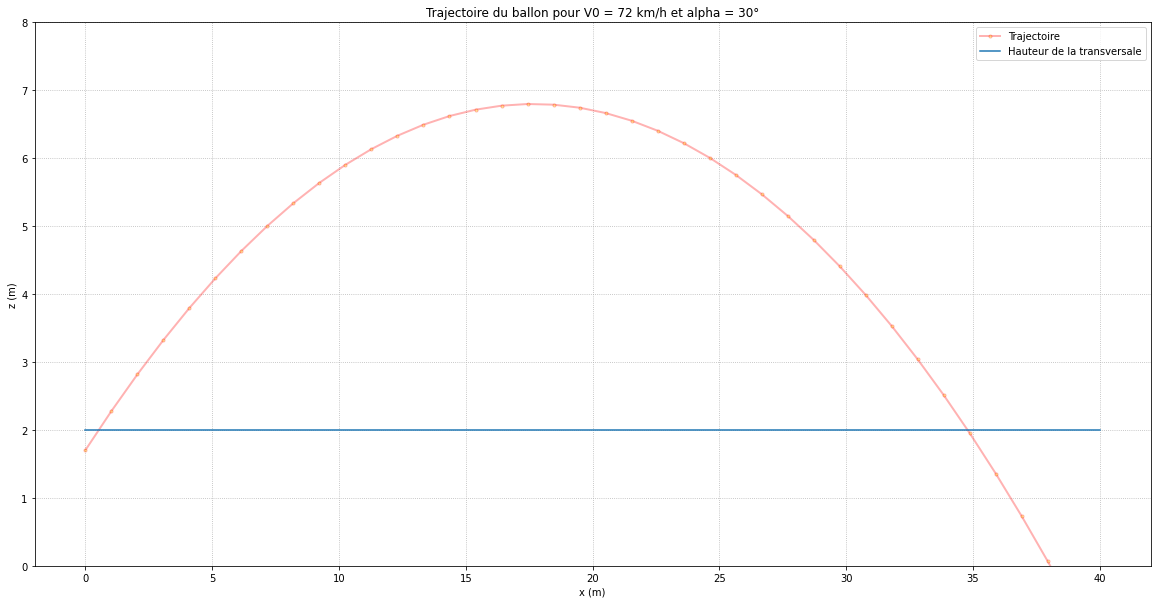

In [49]:
g = 9.81
h0 = 1.70
V0 = 20
alpha = 30 * pi / 180

def trajectoire(x, g, V0, alpha, h0):
    return (-0.5 * g * x**2)/(V0 * np.cos(alpha))**2 + np.tan(alpha) * x + h0

x = np.linspace(0, 40, 40)

fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 10)
ax.plot(x, trajectoire(x, g, V0, alpha, h0), label='Trajectoire', color='red', 
        alpha=0.3, linestyle='solid', linewidth=2, marker='o', markersize=3,
        markerfacecolor='yellow', markeredgecolor='red')
ax.plot(x, 0*x+2, label='Hauteur de la transversale')
ax.set_xlabel('x (m)')
ax.set_ylabel('z (m)')
ax.set_ylim([0,8])
ax.set_title('Trajectoire du ballon pour V0 = 72 km/h et alpha = 30°')
ax.grid(True,linestyle=':')
ax.legend()

## Recherche des plages de valeurs de alpha pour V0 = 72 km/h
On fixe x = 40 m

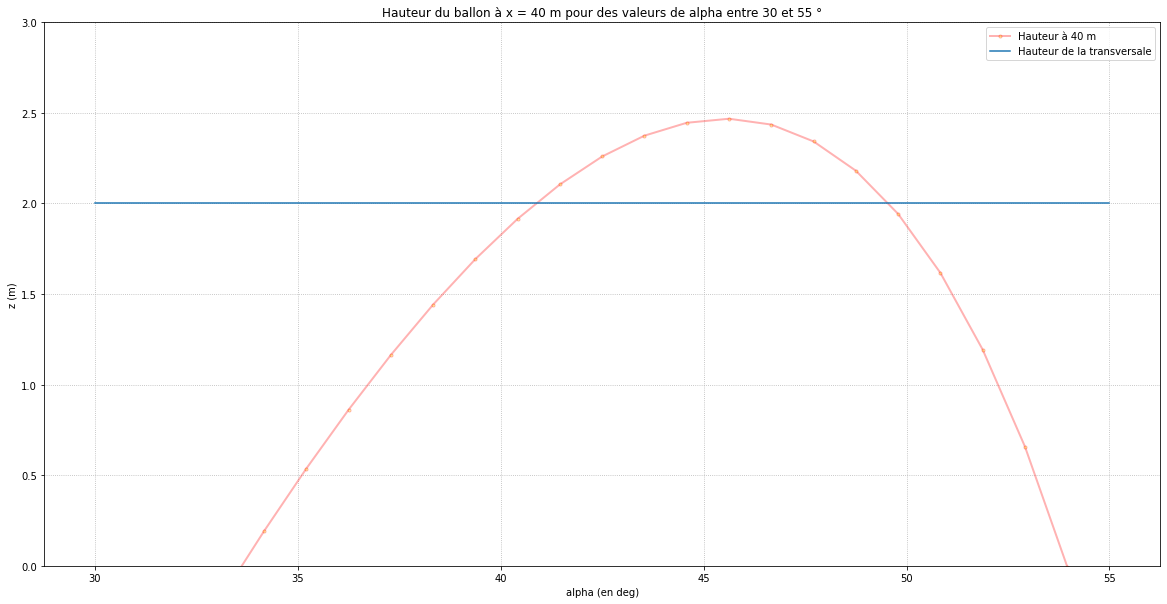

In [3]:
x40 = 40

x = np.linspace(30,55,25)
y = (-0.5 * g * x40**2 / V0**2) / (np.cos(x * pi / 180))**2 + np.tan(x * pi / 180)*x40 + h0

fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 10)
ax.plot(x, y, alpha=0.3, label='Hauteur à 40 m', color='red', 
        linestyle='solid', linewidth=2, marker='o', markersize=3,
        markerfacecolor='yellow', markeredgecolor='red')
ax.plot(x, 0*x+2, label='Hauteur de la transversale')
ax.set_xlabel('alpha (en deg)')
ax.set_ylabel('z (m)')
ax.set_ylim([0,3])
ax.set_title('Hauteur du ballon à x = 40 m pour des valeurs de alpha entre 30 et 55 °')
plt.legend()
ax.grid(True,linestyle=':')
plt.show()

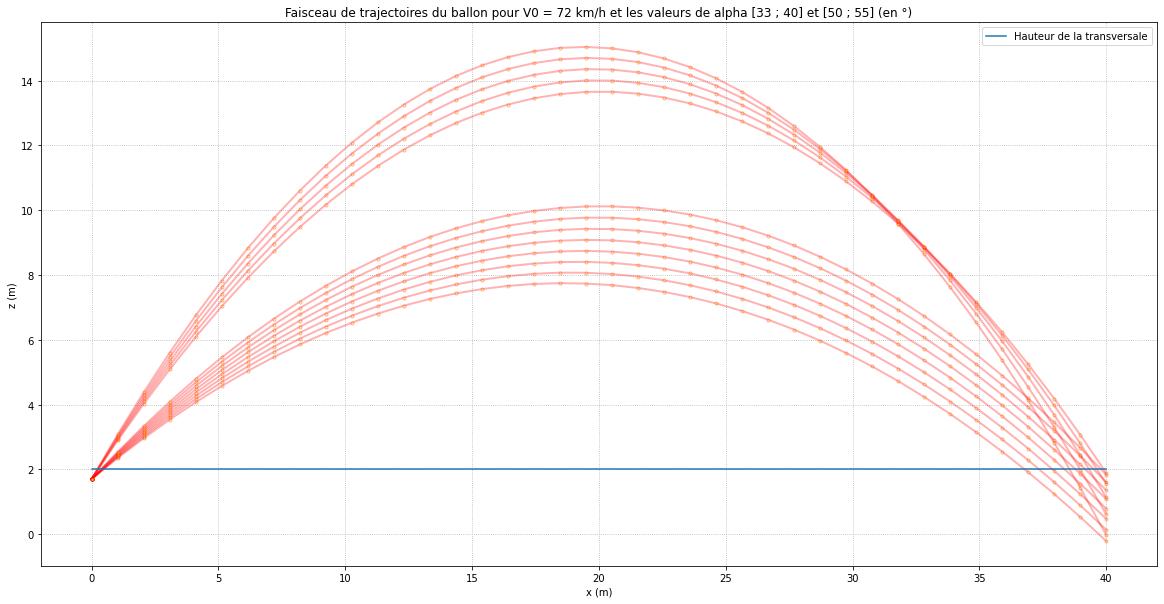

In [4]:
x = np.linspace(0, 40, 40)

fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 10)
for i in range(33,41):
    i = i * pi / 180 
    ax.plot(x, trajectoire(x, g, V0, i, h0), color='red', 
        alpha=0.3, linestyle='solid', linewidth=2, marker='o', markersize=3,
        markerfacecolor='yellow', markeredgecolor='red')
for i in range(50,55):
    i = i * pi / 180 
    ax.plot(x, trajectoire(x, g, V0, i, h0), color='red', 
        alpha=0.3, linestyle='solid', linewidth=2, marker='o', markersize=3,
        markerfacecolor='yellow', markeredgecolor='red')
ax.plot(x, 0*x+2, label='Hauteur de la transversale')
ax.set_xlabel('x (m)')
ax.set_ylabel('z (m)')
ax.set_title('Faisceau de trajectoires du ballon pour V0 = 72 km/h et les valeurs de alpha [33 ; 40] et [50 ; 55] (en °)')
ax.grid(True,linestyle=':')
ax.legend()

## Optimisation de la vitesse de tir en fonction de l'angle de tir
Rappel de l'équation :
$$z(x,\alpha,V_0) = - 1/2 . g . \frac{x^2}{(V_{0}. cos(\alpha))^2} + tan(\alpha) . x + h_0$$ 
d'où...
$$V_0(\alpha) = \sqrt{\frac{1/2.g.40^2}{cos^2(\alpha).(h_0+40.tan(\alpha))}}$$
avec x = 40 m et z = 0.

Première partie : graphiques...

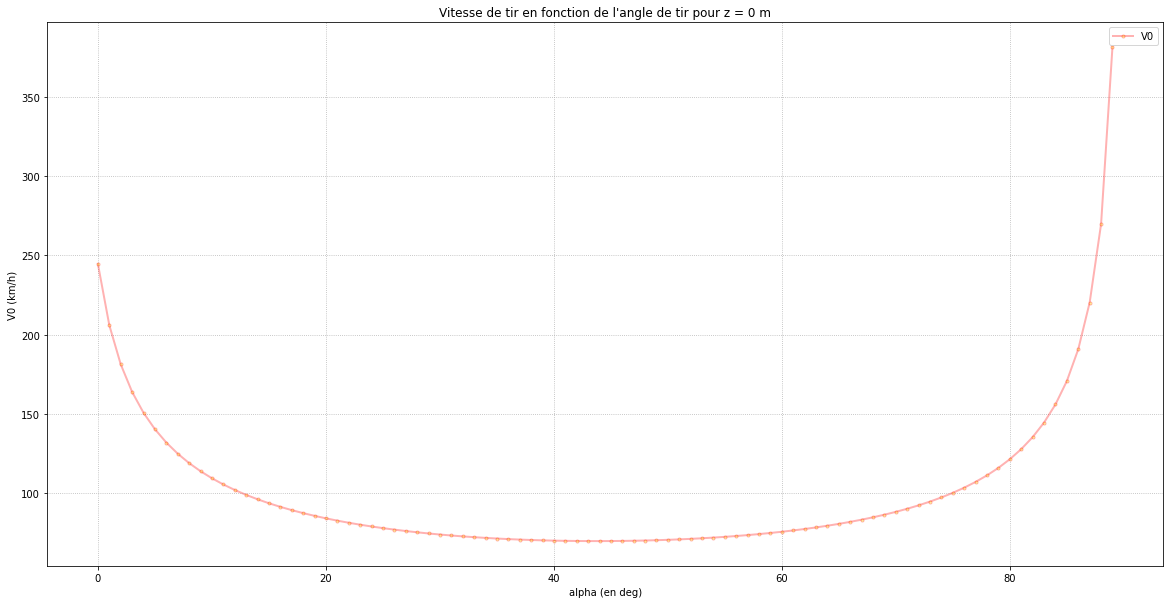

In [5]:
x = np.linspace(0,89,90)

y = np.sqrt((0.5 * g * x40**2) / ((np.cos(x * pi / 180))**2 * (h0 + x40 * np.tan(x * pi / 180)))) * 3.6

fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 10)
ax.plot(x, y, alpha=0.3, label='V0', color='red', 
        linestyle='solid', linewidth=2, marker='o', markersize=3,
        markerfacecolor='yellow', markeredgecolor='red')
ax.set_xlabel('alpha (en deg)')
ax.set_ylabel('V0 (km/h)')
ax.set_title('Vitesse de tir en fonction de l\'angle de tir pour z = 0 m')
plt.legend()
ax.grid(True,linestyle=':')
plt.show()

Deuxième partie : recherche de la solution avec méthodes numériques :

Pour cela il faut utiliser la dérivée de la courbe précédente par rapport à alpha et chercher lorsqu'elle s'annule.

L'équation de la dérivée de V0 par rapport à alpha est la suivante (pour x = 40 et z = 0, toujours) :
$$\frac{dV_0}{d\alpha} = \frac{-40.\sqrt{1/2.g}.(-2.sin(\alpha).(h_0 + 40.tan(\alpha)) + 40.cos(\alpha).(1+tan^2(\alpha)))}{2.cos^2(\alpha).(h_0+40.tan(\alpha))^{3/2}}$$



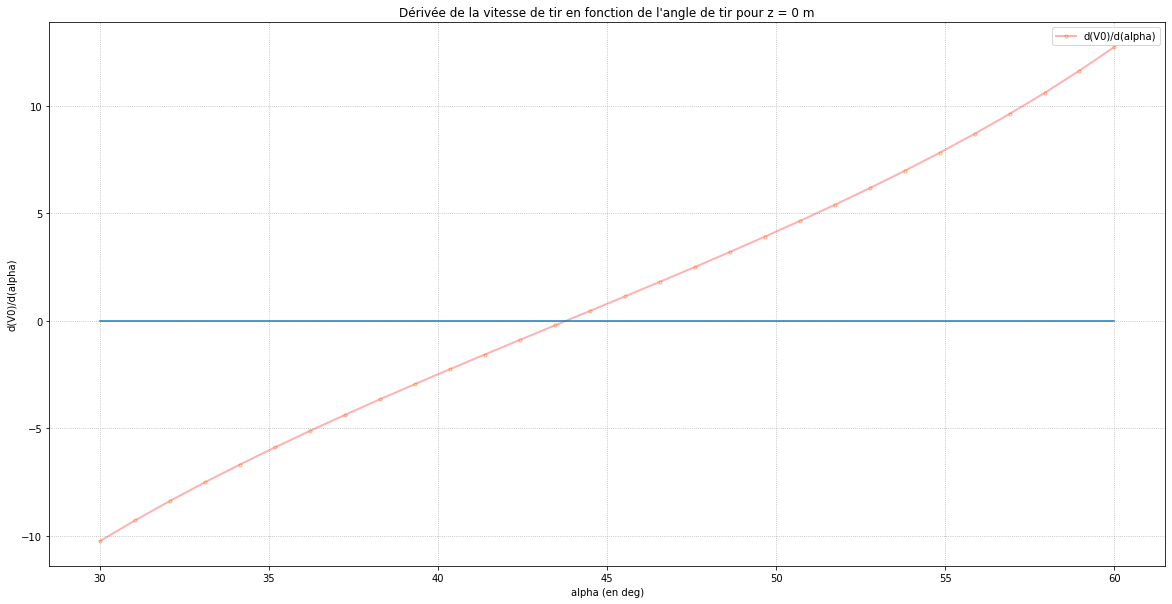

In [6]:
x = np.linspace(30,60,30)

y = ((-40 * np.sqrt(0.5 * g)) * (-2 * np.sin(x * pi/180) * (h0 + 40 * np.tan(x * pi/180)) + 40 * np.cos(x * pi/180) * (1 + (np.tan(x * pi/180))**2 )) / (2 * (np.cos(x * pi/180))**2 * (h0 + 40 * np.tan(x * pi/180))**1.5))

fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 10)
ax.plot(x, y, alpha=0.3, label='d(V0)/d(alpha)', color='red', 
        linestyle='solid', linewidth=2, marker='o', markersize=3,
        markerfacecolor='yellow', markeredgecolor='red')
ax.plot(x, 0*x)
ax.set_xlabel('alpha (en deg)')
ax.set_ylabel('d(V0)/d(alpha)')
ax.set_title('Dérivée de la vitesse de tir en fonction de l\'angle de tir pour z = 0 m')
plt.legend()
ax.grid(True,linestyle=':')
plt.show()

Résolution par la méthode de dichotomie

In [7]:
def fonction(x):
    y = ((-40 * np.sqrt(0.5 * g)) * (-2 * np.sin(x * pi/180) * (h0 + 40 * np.tan(x * pi/180)) + 40 * np.cos(x * pi/180) * (1 + (np.tan(x * pi/180))**2 )) / (2 * (np.cos(x * pi/180))**2 * (h0 + 40 * np.tan(x * pi/180))**1.5))
    return y
         
def dichotomie(f, a, b, k, epsilon):
    # cas d'une fonction croissante monotone sur l'intervalle
    debut = a
    fin = b
    ecart = b - a
    iteration = 0
    while ecart > epsilon:
        milieu = (debut + fin) / 2
        if f(milieu) > k:
            # la solution est inférieure à m
            fin = milieu
        else:
            # la solution est supérieure à m
            debut = milieu
        ecart = fin - debut
        iteration += 1
    return milieu, iteration
            
result, iteration = dichotomie(fonction, 40, 45, 0, 0.001)
print('résultat :',result, '° (en', iteration, 'itérations, avec une précision au millième)')

résultat : 43.7835693359375 ° (en 13 itérations, avec une précision au millième)


Méthode de la dichotomie par récurence... (à ne pas faire pour des problèmes de performance/mémoire, car on recalcule à chaque itération tous les précédentes).

In [8]:
def dichotomie_rec(f, a, b, k, epsilon, iteration):
    ecart = b - a
    if ecart < epsilon:
        return a, b, iteration
    else:
        iteration += 1
        milieu = (b + a) / 2 
        if f(milieu) > k:
            return dichotomie_rec(f, a, milieu, k, epsilon, iteration)
        else:
            return dichotomie_rec(f, milieu, b, k, epsilon, iteration)

iteration = 0
inf, sup, iteration = dichotomie_rec(fonction, 40, 45, 0, 0.001, iteration)
print('résultat entre : [',inf, ';', sup, ']°', 'en', iteration, 'itérations.') 

résultat entre : [ 43.782958984375 ; 43.7835693359375 ]° en 13 itérations.


Résolution par la méthode des sécantes

In [9]:
def secantes(f, a, b, k, epsilon):
    # cas d'une fonction croissante monotone dans l'intervalle
    # ne fonctionne que si on est sur un intervalle déjà "proche" de la solution
    debut = a
    fin = b
    ecart = b - a
    iteration = 0
    while ecart > epsilon:
        secant = debut - f(debut) * (fin - debut) / (f(fin) - f(debut))
        if f(debut) * f(secant) > 0:
            fin = secant
        elif f(fin) * f(secant) > 0:
            debut = secant
        else:
            break
        ecart = fin - debut
        iteration += 1
        # print(f(secant),secant,ecart,iteration)
    return secant, iteration

result, iteration = secantes(fonction, 40, 45, 0, 0.001)
print('résultat :',result, '° (en', iteration, 'itérations, avec une précision au millième)')

résultat : 43.78320494808058 ° (en 2 itérations, avec une précision au millième)


## AJout des frottements de l'air - 1er cas, frottements proportionnels à la vitesse
Il s'agit ici de la poussée d'Archimède, on ajoute dans le PDF : B(t) = k.v(t) selon le vecteur v. Avec k le coefficient de frottement.

On obtient les équations paramétriques en fonction de t suivantes :
$$ x(t) = \frac{m}{k} . v_0.cos(\alpha).(1 - e^{-\frac{k}{m}.t})$$

$$ z(t) = \frac{m}{k} . (v_0.sin(\alpha) + \frac{m}{k} . g) . (1 - e^{- \frac{k}{m} . t)} -  \frac{m}{k} . g . t$$

soit une trajectoire z(x) :
$$ z(x) = \frac{(sin(\alpha) . k^2 . v_0 + m.g.k). x - v_0 . cos(\alpha) . m^2 . g . ln(\frac{m . v_0 . cos(\alpha)}{m . v_0 . cos(\alpha) - k.x}) }{cos(\alpha) . k^2 . v_0}$$

Avec la constante k = 0.001 kg/s,
et m = 0.5 kg environ pour un ballon de handball, on prends v0 = 20 m/s, alpha = 34° et h0 = 1.70 m.

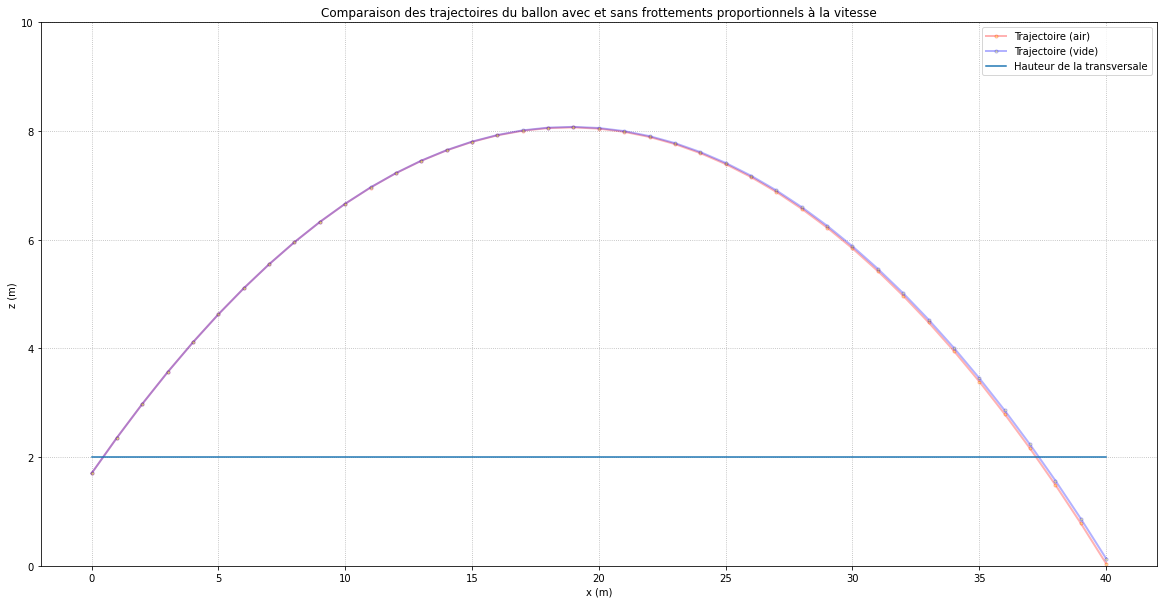

In [50]:
g = 9.81
h0 = 1.70
V0 = 20
alpha = 34
m = 0.5
k = 0.001

def trajectoire_vide(x, g, V0, alpha, h0):
    return (-0.5 * g * x**2)/(V0 * np.cos(alpha*pi/180))**2 + np.tan(alpha*pi/180) * x + h0

def trajectoire_archimede(x, g, V0, alpha, h0, m, k):
    z = ((np.sin(alpha * pi / 180) * (k**2) * V0 + m * g * k) * x - V0 * np.cos(alpha * pi / 180) * (m**2) * g * np.log((m * V0 * np.cos(alpha * pi / 180)) / (m * V0 * np.cos(alpha * pi / 180) - k * x))) / (np.cos(alpha * pi / 180) * k**2 * V0) + h0
    return z

x = np.linspace(0, 40, 41)

fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 10)
ax.plot(x, trajectoire_archimede(x, g, V0, alpha, h0, m, k), label='Trajectoire (air)', color='red', 
        alpha=0.3, linestyle='solid', linewidth=2, marker='o', markersize=3,
        markerfacecolor='yellow', markeredgecolor='red')
ax.plot(x, trajectoire_vide(x, g, V0, alpha, h0), label='Trajectoire (vide)', color='blue', 
        alpha=0.3, linestyle='solid', linewidth=2, marker='o', markersize=3,
        markerfacecolor='yellow', markeredgecolor='blue')
ax.plot(x, 0*x+2, label='Hauteur de la transversale')
ax.set_xlabel('x (m)')
ax.set_ylabel('z (m)')
ax.set_ylim([0,10])
ax.set_title('Comparaison des trajectoires du ballon avec et sans frottements proportionnels à la vitesse')
ax.grid(True,linestyle=':')
ax.legend()

On se rend compte que la différence est minime...

Un exemple pour un projectile qui part de l'origine à 220 m/s, de poids 95 g avec un angle de 45° (correspond à  une arme utilisée de type "revolver à poudre noire : reproduction du Remington New Army 1858), calibre .45 (soit un diamètre de 11,55 mm), V0 = 220 m/s = vitesse de sortie de la balle du canon, masse de la balle (ronde en plomb) : 9.5 g)"

<ipython-input-48-0538da43ca9b>:12: RuntimeWarning: invalid value encountered in log
  z = ((np.sin(alpha * pi / 180) * (k**2) * V0 + m * g * k) * x - V0 * np.cos(alpha * pi / 180) * (m**2) * g * np.log((m * V0 * np.cos(alpha * pi / 180)) / (m * V0 * np.cos(alpha * pi / 180) - k * x))) / (np.cos(alpha * pi / 180) * k**2 * V0) + h0


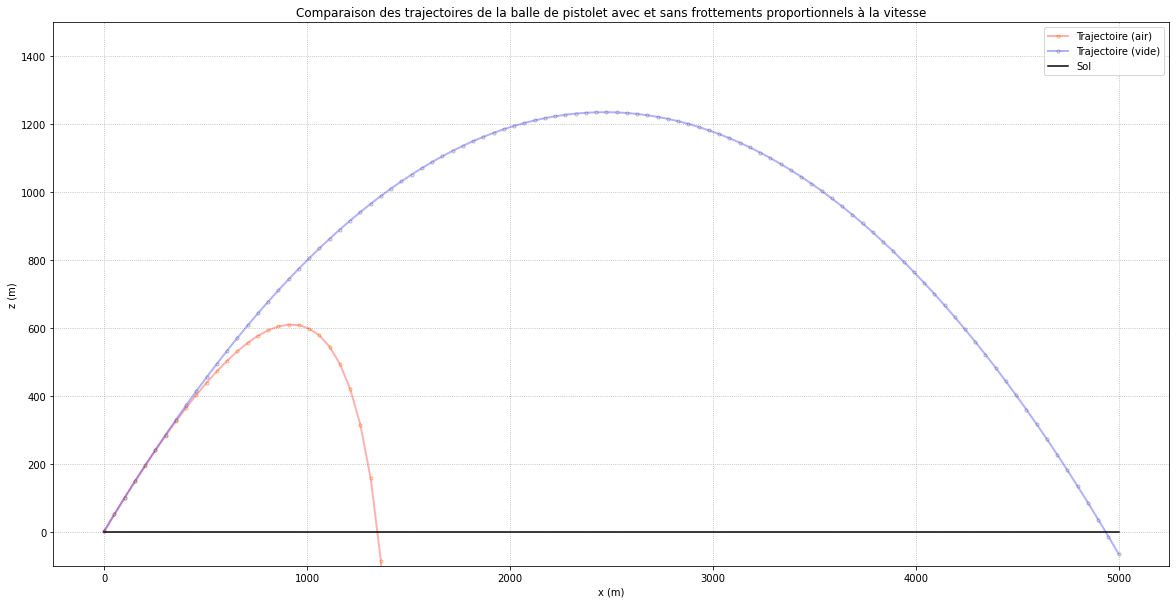

In [48]:
g = 9.81
h0 = 1.70
V0 = 220
alpha = 45
m = 0.0095
k = 0.001

def trajectoire_vide(x, g, V0, alpha, h0):
    return (-0.5 * g * x**2)/(V0 * np.cos(alpha*pi/180))**2 + np.tan(alpha*pi/180) * x + h0

def trajectoire_archimede(x, g, V0, alpha, h0, m, k):
    z = ((np.sin(alpha * pi / 180) * (k**2) * V0 + m * g * k) * x - V0 * np.cos(alpha * pi / 180) * (m**2) * g * np.log((m * V0 * np.cos(alpha * pi / 180)) / (m * V0 * np.cos(alpha * pi / 180) - k * x))) / (np.cos(alpha * pi / 180) * k**2 * V0) + h0
    return z    

x = np.linspace(0, 5000, 100)

fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = (20, 10)
ax.plot(x, trajectoire_archimede(x, g, V0, alpha, h0, m, k), label='Trajectoire (air)', color='red', 
        alpha=0.3, linestyle='solid', linewidth=2, marker='o', markersize=3,
        markerfacecolor='yellow', markeredgecolor='red')
ax.plot(x, trajectoire_vide(x, g, V0, alpha, h0), label='Trajectoire (vide)', color='blue', 
        alpha=0.3, linestyle='solid', linewidth=2, marker='o', markersize=3,
        markerfacecolor='yellow', markeredgecolor='blue')
ax.plot(x, 0*x, color='black', label='Sol')
ax.set_xlabel('x (m)')
ax.set_ylabel('z (m)')
ax.set_ylim([-100,1500])
ax.set_title('Comparaison des trajectoires de la balle de pistolet avec et sans frottements proportionnels à la vitesse')
ax.grid(True,linestyle=':')
ax.legend()